In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
import joblib
style.use("ggplot")

In [2]:
data = pd.read_csv("Storage/Data.csv", index_col=0)
data

,Open,High,Low,Close,Volume,20 Day SMA,Mean Daily Returns,Mean Log Volume,RSI,MACD,CCI
0,110.181641,110.838913,106.596558,107.552582,8026376,110.608867,-0.003614,15.629914,44.267472,-0.385340,-103.402257
1,107.074570,108.448853,103.967499,106.118546,8006921,110.106955,-0.004281,15.638097,42.053913,-0.673441,-201.879516
2,105.640533,105.640533,103.728493,103.967499,7777324,109.611018,-0.004317,15.641566,38.910861,-1.042922,-213.922932
3,104.027245,106.118546,103.429733,105.640533,9531152,109.312261,-0.002515,15.672634,42.509833,-1.210049,-141.600744
4,105.043022,105.043022,100.322655,103.250481,10786561,109.049355,-0.002255,15.683339,38.977097,-1.494279,-151.793647
...,...,...,...,...,...,...,...,...,...,...,...
5720,141.500000,144.130005,140.960007,143.169998,5869400,134.199998,0.008970,15.490543,69.669913,3.660861,189.674145
5721,142.630005,146.080002,142.179993,144.199997,5293500,135.333998,0.008713,15.489007,70.874403,3.869833,194.869816
5722,144.080002,146.160004,142.000000,144.339996,4727100,136.403998,0.008178,15.485012,71.042733,4.004362,146.795982
5723,144.130005,144.949997,144.009995,144.520004,3445200,137.504498,0.008415,15.458058,71.272630,4.081139,125.375778


In [3]:
##Setting parameters

train_size, val_size, test_size = 0.7, 0.15, 0.15

train_ind, val_ind = int(len(data)*train_size), int(len(data)*(train_size+val_size))

n_steps = 48

#exclude raw volume from features because of too much noise no signal
exclude_features = ["Volume"] 

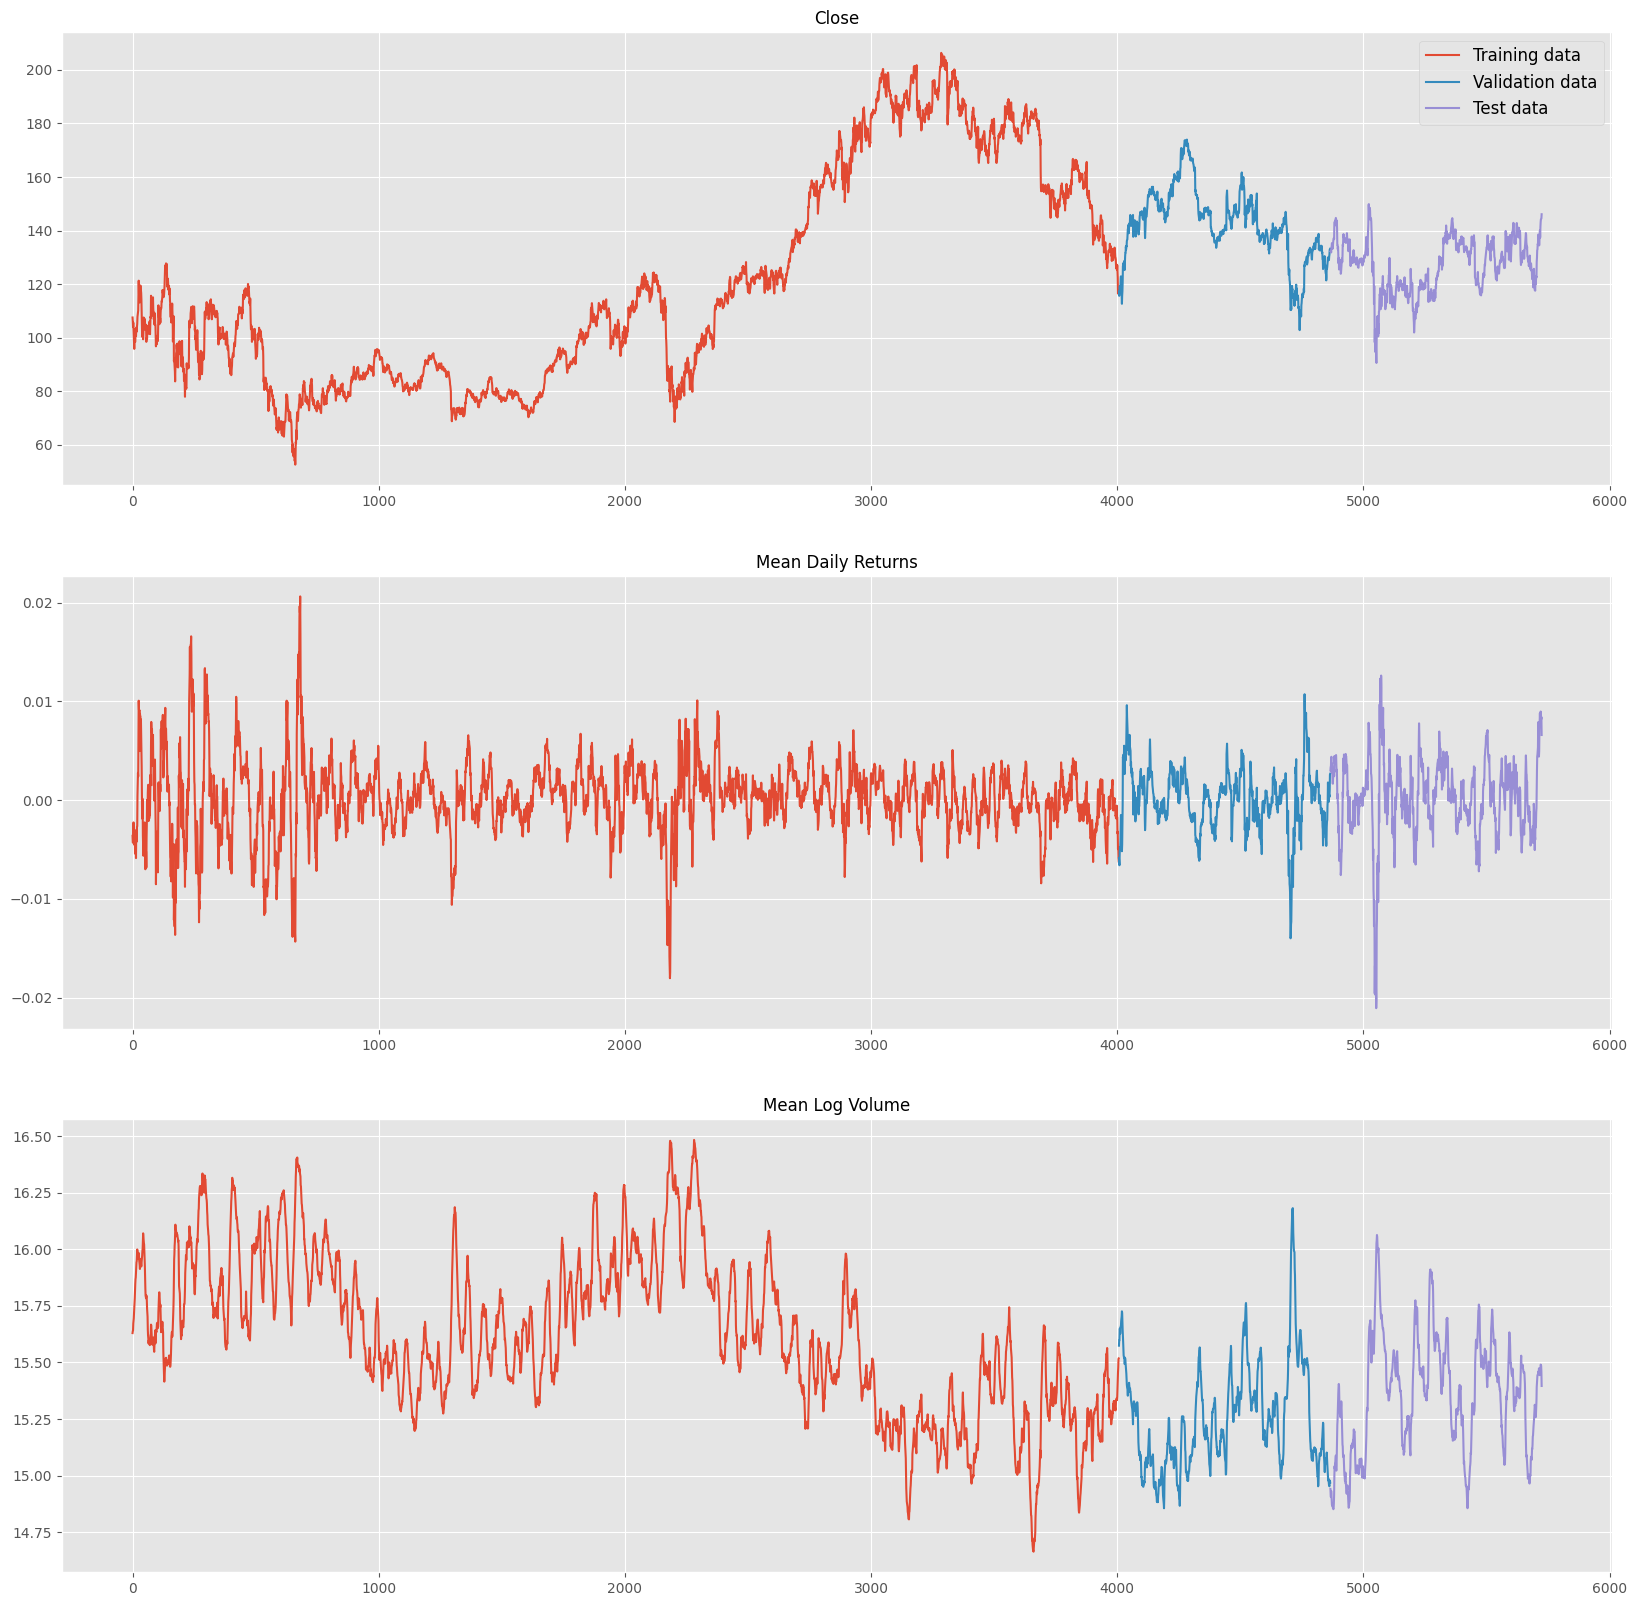

In [4]:
##Helper function to plot train_test split

def plot_train_test(data, train_ind, val_ind):

    fig, axes = plt.subplots(3,1, figsize=(20,20))
    ax1,ax2,ax3 = axes
            
    ax1.plot(np.arange(train_ind), data["Close"].iloc[:train_ind], label='Training data')
    ax2.plot(np.arange(train_ind), data["Mean Daily Returns"].iloc[:train_ind], label='Training data')
    ax3.plot(np.arange(train_ind), data["Mean Log Volume"].iloc[:train_ind], label='Training data')

    ax1.plot(np.arange(train_ind,val_ind), data["Close"].iloc[train_ind:val_ind], label='Validation data')
    ax2.plot(np.arange(train_ind,val_ind), data["Mean Daily Returns"].iloc[train_ind:val_ind], label='Validation data')
    ax3.plot(np.arange(train_ind,val_ind), data["Mean Log Volume"].iloc[train_ind:val_ind], label='Validation data')

    ax1.plot(np.arange(val_ind, len(data)), data["Close"].iloc[val_ind:], label='Test data')
    ax2.plot(np.arange(val_ind, len(data)), data["Mean Daily Returns"].iloc[val_ind:], label='Test data')
    ax3.plot(np.arange(val_ind, len(data)), data["Mean Log Volume"].iloc[val_ind:], label='Test data')
            
    ax1.set_title("Close", fontsize=12)
    ax1.legend(loc="best", fontsize=12)

    ax2.set_title("Mean Daily Returns", fontsize=12)
    ax3.set_title("Mean Log Volume", fontsize=12)
            
    plt.show()

plot_train_test(data, train_ind, val_ind)

In [5]:
#We'll normalize the data into a range of values between [0,1] for better learning

scaler = MinMaxScaler()
scaler.fit(data[[i for i in data if i not in exclude_features]].iloc[:train_ind])
scaled_data = scaler.transform(data[[i for i in data if i not in exclude_features]])

joblib.dump(scaler, "Storage/Scaler.gz")

scaled_df = pd.DataFrame(data=scaled_data, index=data.index, columns = [i for i in data.columns if i not in exclude_features])
scaled_df

,Open,High,Low,Close,20 Day SMA,Mean Daily Returns,Mean Log Volume,RSI,MACD,CCI
0,0.377030,0.372095,0.358662,0.357307,0.361270,0.372895,0.530893,0.470342,0.545504,0.374403
1,0.356810,0.356391,0.341506,0.347975,0.357802,0.355648,0.535390,0.442638,0.521570,0.248526
2,0.347477,0.337940,0.339946,0.333976,0.354375,0.354713,0.537296,0.403301,0.490876,0.233131
3,0.336978,0.341080,0.337997,0.344864,0.352311,0.401317,0.554369,0.448344,0.476992,0.325576
4,0.343589,0.334014,0.317721,0.329310,0.350494,0.408060,0.560252,0.404130,0.453380,0.312547
...,...,...,...,...,...,...,...,...,...,...
5720,0.580844,0.590829,0.582907,0.589099,0.524289,0.698451,0.454306,0.788267,0.881637,0.749023
5721,0.588198,0.603641,0.590868,0.595802,0.532125,0.691809,0.453462,0.803342,0.898997,0.755664
5722,0.597634,0.604167,0.589694,0.596713,0.539519,0.677949,0.451267,0.805449,0.910173,0.694215
5723,0.597959,0.596217,0.602810,0.597884,0.547124,0.684087,0.436455,0.808326,0.916551,0.666835


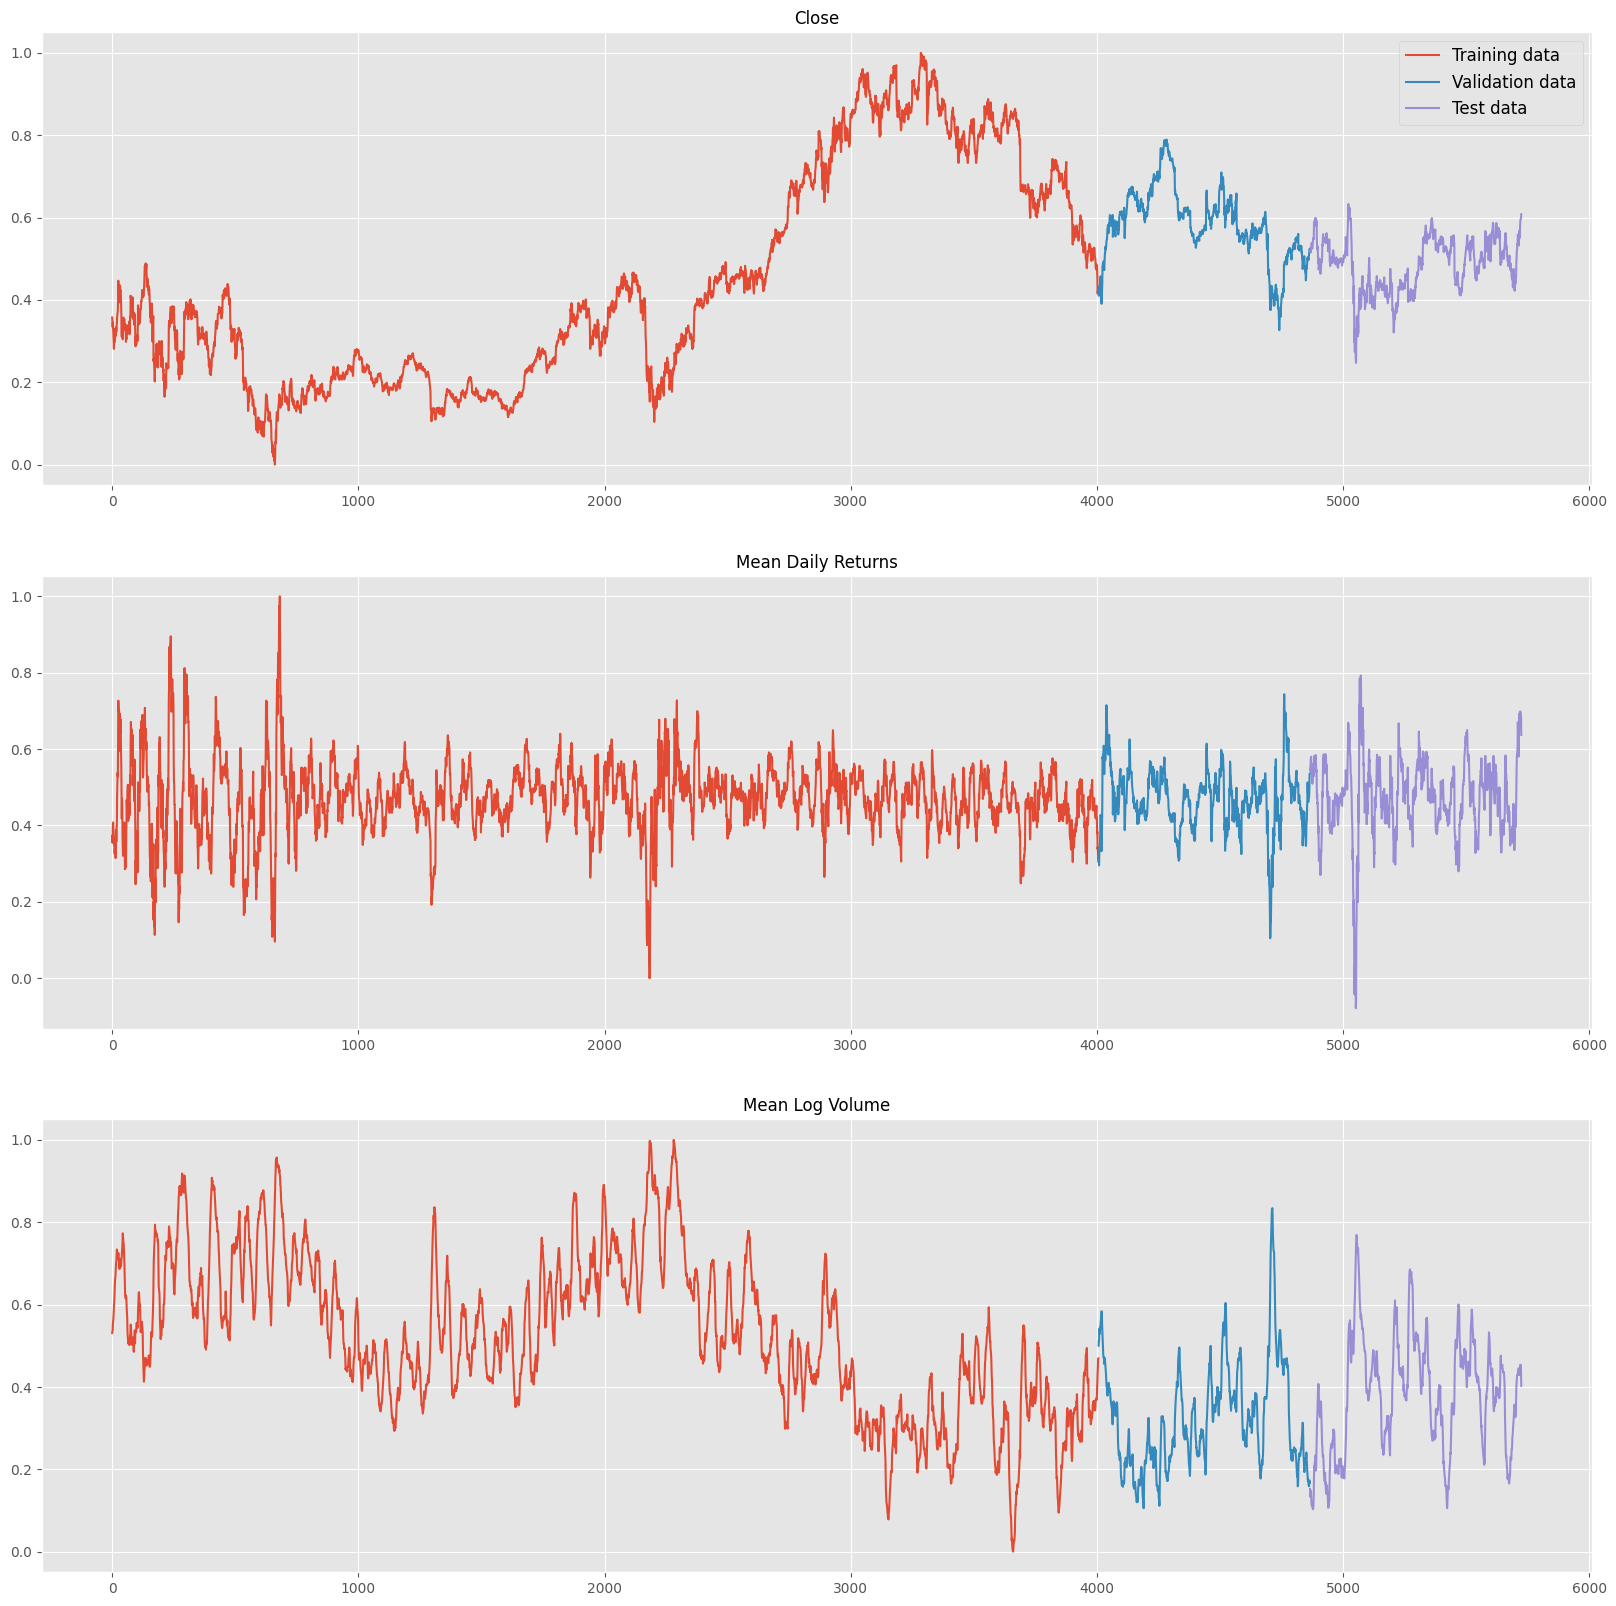

In [6]:
plot_train_test(scaled_df, train_ind, val_ind)

In [7]:
##function to genereate input data of shape = (length, n_steps, n_features)

def generate_input(data, train_ind, val_ind, n_steps):

    features = []
    labels = []

    for i in range(n_steps, len(data)):

        input_data = data[i-n_steps:i]

        label = data["Close"].iloc[i]

        features.append(input_data)
        labels.append(label)
    
    features = np.array(features).reshape(len(features), n_steps, len(data.columns))
    labels = np.array(labels).reshape(len(labels), 1)

    X_train, y_train = features[:train_ind,:,:], labels[:train_ind,:]
    X_val, y_val = features[train_ind:val_ind,:,:], labels[train_ind:val_ind,:]
    X_test, y_test = features[val_ind:,:,:], labels[val_ind:,:]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [8]:
input_data = generate_input(scaled_df, train_ind, val_ind, n_steps)

In [9]:
input_data[0][0].shape, input_data[1][0].shape, input_data[2][0].shape 
#4007 training data, 859 validation data and 811 test data

((4007, 48, 10), (859, 48, 10), (811, 48, 10))

In [10]:
joblib.dump(input_data, "Storage/Input Data") 

['Storage/Input Data']